# Hopfield Netoworks

## Redes Neuronales

 Una red neuronal artificial es un modelo matemático inspirado en redes neuronales biológicas. Consiste de un grupo entrelazado de nodos o neuronas artificiales individuales cuya estructura se escoge de acuerdo al problema que se enfrenta.

La estructura y funcionamiento del sistema nervioso central tiene como parte constituyente a la neurona biológica que consiste en un cuerpo celular, el axón, las dendritas y las sinapsis. Estas últimas son las conexiones entre neuronas. El mecanismo sináptico es el que se busca mapear a un algoritmo analítico.

Una neurona artificial se conoce también como _perceptrón_ y su forma básica es la siguiente:

\begin{equation}
  y(x_1, \dots, x_n) = f(w_1 x_1 + \dots w_n x_n + b). \\
\end{equation}

Donde cada $x_i$ se toma en cuenta individualmente por medio de un peso aprendido $w_i$.

Esto nos permite construir un mapeo de $(x_1, \dots, x_n) = \bf{x} \in \mathbb{R}^n$ a la variable de salida $y$. La función $f$ se puede definir como una función de salto:

\begin{equation*}
f(s)=\begin{cases}
          0 \quad &\text{if} \, s \leq 0 \\
          1 \quad &\text{if} \, s > 0 \\
     \end{cases}
\end{equation*}

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
nb_patterns = 4   # Numero de patrones a aprender

# Para poder visualizar los patrones:
# cada arreglo podria verse como una matriz de 5 x 5
pattern_width = 5 
pattern_height = 5

# Veces que vamos a actualizar el resultado de usar W
max_iterations = 10

In [10]:
U =  [-1,1,1,1,-1,
      -1,1,1,1,-1,
      -1,1,1,1,-1,
      -1,1,1,1,
      -1,-1,-1,-1,-1,-1]

N = [-1,-1,1,1,-1,
    -1,-1,1,1,-1,
    -1,1,-1,1,-1,
    -1,1,1,-1,-1,
    -1,1,1,-1,-1]

A = [1,-1,-1,-1,1,
    -1,-1,1,-1,-1,
    -1,1,1,1,-1,
    -1,-1,-1,-1,-1,
    -1,1,1,1,-1]

M = [-1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,1,1,1,-1,-1,1,1,1,-1]

In [13]:
u_w = [-1*x for x in U]
n_w = [-1*x for x in N]
a_w = [-1*x for x in A]
m_w = [-1*x for x in M]

In [14]:
patterns = np.array([u_w,n_w,a_w,m_w],dtype=float)

In [44]:
len([-1,1,1,1,-1,-1,1,1,1,-1,-1,1,1,1,-1,-1,1,1,1,-1,-1,-1,-1,-1,-1])

25

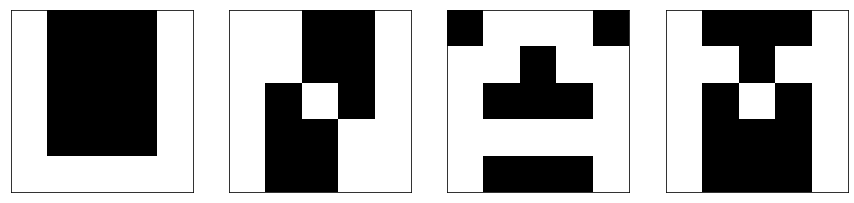

In [19]:
# Show the patterns
fig, ax = plt.subplots(1, nb_patterns, figsize=(15, 10))

for i in range(nb_patterns):
    ax[i].matshow(patterns[i].reshape((pattern_height, pattern_width)), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [20]:
# Train the network
W = np.zeros((pattern_width * pattern_height, pattern_width * pattern_height))

In [21]:
for i in range(pattern_width * pattern_height):
    for j in range(pattern_width * pattern_height):
        if i == j or W[i, j] != 0.0:
            continue

        w = 0.0

        for n in range(nb_patterns):
            w += patterns[n, i] * patterns[n, j]

        W[i, j] = w / patterns.shape[0]
        W[j, i] = W[i, j]

In [22]:
W.shape

(25, 25)

In [23]:
# Test the Network
# Create a corrupted pattern S
S = np.array(  [-1,1,1,1,-1,-1,1,1,1,-1,-1,1,1,1,-1,-1,1,1,1,-1,-1,-1,-1,-1,-1],#  [1,-1,-1,-1,-1,1,1,1,1,1,-1,-1,1,1,1,-1,1,1,1,1,1,1,-1,-1,-1.],
   dtype=float)

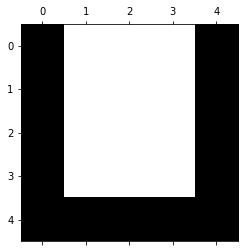

In [24]:

# Show the corrupted pattern
fig, ax = plt.subplots()
ax.matshow(S.reshape((pattern_height, pattern_width)), cmap='gray')

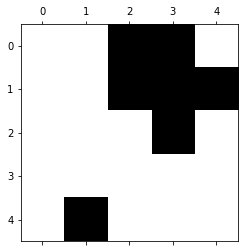

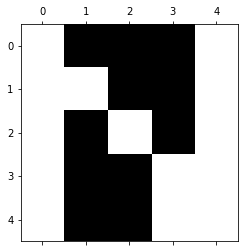

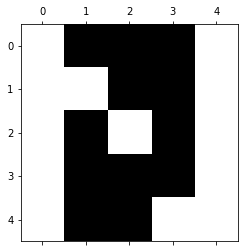

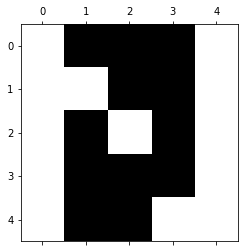

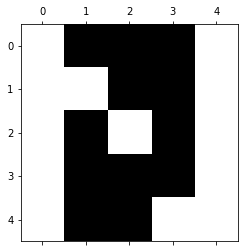

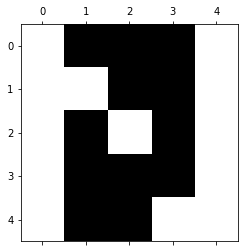

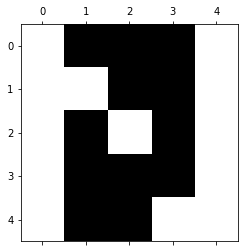

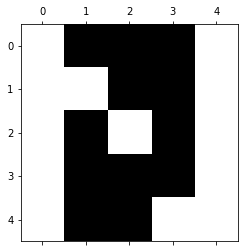

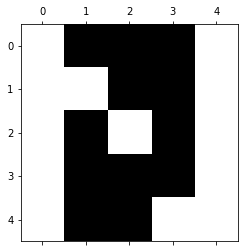

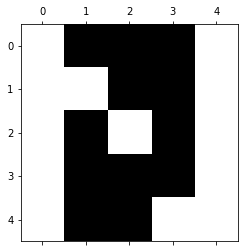

In [25]:
h = np.zeros((pattern_width * pattern_height))
#Defining Hamming Distance matrix for seeing convergence
hamming_distance = np.zeros((max_iterations,nb_patterns))
for iteration in range(max_iterations):
    for i in range(pattern_width * pattern_height):
        i = np.random.randint(pattern_width * pattern_height)
        h[i] = 0
        for j in range(pattern_width * pattern_height):
            h[i] += W[i, j]*S[j]
        S = np.where(h<0, -1, 1)
    for i in range(nb_patterns):
        hamming_distance[iteration, i] = ((patterns - S)[i]!= 0).sum()

    fig, ax = plt.subplots()
    ax.matshow(S.reshape((pattern_height, pattern_width)), cmap='gray')

# Dense Associative Memory